In [44]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [45]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [46]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [47]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [48]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [49]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [50]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a90825a89414dc7f2963916efce1e98


In [51]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Alameda"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a90825a89414dc7f2963916efce1e98&q=Alameda


In [52]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [53]:
# Get the text of the 'Get' request.
city_weather.text


'{"coord":{"lon":-121.88,"lat":37.6},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01d"}],"base":"stations","main":{"temp":75.92,"feels_like":71.35,"temp_min":70,"temp_max":82,"pressure":1012,"humidity":50},"visibility":16093,"wind":{"speed":11.41,"deg":280},"clouds":{"all":1},"dt":1592881231,"sys":{"type":1,"id":4774,"country":"US","sunrise":1592830006,"sunset":1592883148},"timezone":-25200,"id":5322745,"name":"Alameda","cod":200}'

In [54]:
# Get the JSON text of the 'Get' request.
city_weather.json()


{'coord': {'lon': -121.88, 'lat': 37.6},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 75.92,
  'feels_like': 71.35,
  'temp_min': 70,
  'temp_max': 82,
  'pressure': 1012,
  'humidity': 50},
 'visibility': 16093,
 'wind': {'speed': 11.41, 'deg': 280},
 'clouds': {'all': 1},
 'dt': 1592881231,
 'sys': {'type': 1,
  'id': 4774,
  'country': 'US',
  'sunrise': 1592830006,
  'sunset': 1592883148},
 'timezone': -25200,
 'id': 5322745,
 'name': 'Alameda',
 'cod': 200}

In [55]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [56]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 701,
   'main': 'Mist',
   'description': 'mist',
   'icon': '50n'}],
 'base': 'stations',
 'main': {'temp': 65.71,
  'feels_like': 68.67,
  'temp_min': 62.6,
  'temp_max': 69.01,
  'pressure': 1014,
  'humidity': 100},
 'visibility': 8047,
 'wind': {'speed': 4.7, 'deg': 90},
 'clouds': {'all': 75},
 'dt': 1592881222,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1592816870,
  'sunset': 1592871887},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [57]:
# Get the JSON data.
boston_data = city_weather.json()

In [58]:
boston_data['sys']['country']

'US'

In [59]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 69.01 100 75 4.7


In [60]:
boston_data['dt']

1592881222

In [61]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2020-06-23 03:00:22'

In [62]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [72]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 17 of Set 25 | bredasdorp
Processing Record 18 of Set 25 | barrow
Processing Record 19 of Set 25 | busselton
Processing Record 20 of Set 25 | hithadhoo
Processing Record 21 of Set 25 | albany
Processing Record 22 of Set 25 | punta arenas
Processing Record 23 of Set 25 | taolanaro
City not found. Skipping...
Processing Record 24 of Set 25 | yellowknife
Processing Record 25 of Set 25 | tuktoyaktuk
Processing Record 26 of Set 25 | milingimbi
City not found. Skipping...
Processing Record 27 of Set 25 | port alfred
Processing Record 28 of Set 25 | usinsk
Processing Record 29 of Set 25 | illoqqortoormiut
City not found. Skipping...
Processing Record 30 of Set 25 | canitas
City not found. Skipping...
Processing Record 31 of Set 25 | provideniya
Processing Record 32 of Set 25 | sao felix do xingu
Processing Record 33 of Set 25 | zhezkazgan
Processing Record 34 of Set 25 | ponta do sol
Processing Record 35 of Set 25 | los llanos de aridane
Processing Record 36 of Set 25 | sain

Processing Record 31 of Set 28 | sofiysk
City not found. Skipping...
Processing Record 32 of Set 28 | saryshagan
City not found. Skipping...
Processing Record 33 of Set 28 | waipawa
Processing Record 34 of Set 28 | kieta
Processing Record 35 of Set 28 | naze
Processing Record 36 of Set 28 | cadillac
Processing Record 37 of Set 28 | ahuimanu
Processing Record 38 of Set 28 | mirnyy
Processing Record 39 of Set 28 | grand baie
Processing Record 40 of Set 28 | luderitz
Processing Record 41 of Set 28 | sumoto
Processing Record 42 of Set 28 | puerto ayacucho
Processing Record 43 of Set 28 | beringovskiy
Processing Record 44 of Set 28 | attawapiskat
City not found. Skipping...
Processing Record 45 of Set 28 | mahebourg
Processing Record 46 of Set 28 | artyk
City not found. Skipping...
Processing Record 47 of Set 28 | souillac
Processing Record 48 of Set 28 | vuktyl
Processing Record 49 of Set 28 | tutoia
Processing Record 50 of Set 28 | torbay
Processing Record 1 of Set 29 | da nang
Processing

Processing Record 13 of Set 32 | cayenne
Processing Record 14 of Set 32 | khasan
Processing Record 15 of Set 32 | bambous virieux
Processing Record 16 of Set 32 | atbasar
Processing Record 17 of Set 32 | kijang
Processing Record 18 of Set 32 | hofn
Processing Record 19 of Set 32 | lafayette
Processing Record 20 of Set 32 | cambuci
Processing Record 21 of Set 32 | ankang
Processing Record 22 of Set 32 | sumkino
Processing Record 23 of Set 32 | kaitangata
Processing Record 24 of Set 32 | lashma
Processing Record 25 of Set 32 | biak
Processing Record 26 of Set 32 | abu dhabi
Processing Record 27 of Set 32 | mahanoro
Processing Record 28 of Set 32 | faanui
Processing Record 29 of Set 32 | piacabucu
Processing Record 30 of Set 32 | glace bay
Processing Record 31 of Set 32 | geraldton
Processing Record 32 of Set 32 | vaitupu
City not found. Skipping...
Processing Record 33 of Set 32 | rio gallegos
Processing Record 34 of Set 32 | codrington
Processing Record 35 of Set 32 | beckley
Processing

City not found. Skipping...
Processing Record 47 of Set 35 | priekule
Processing Record 48 of Set 35 | serenje
Processing Record 49 of Set 35 | van buren
Processing Record 50 of Set 35 | gigmoto
Processing Record 1 of Set 36 | udachnyy
Processing Record 2 of Set 36 | tual
Processing Record 3 of Set 36 | ankara
Processing Record 4 of Set 36 | inzer
Processing Record 5 of Set 36 | merauke
Processing Record 6 of Set 36 | urengoy
Processing Record 7 of Set 36 | alta floresta
Processing Record 8 of Set 36 | calbuco
Processing Record 9 of Set 36 | sorvag
City not found. Skipping...
Processing Record 10 of Set 36 | lorengau
Processing Record 11 of Set 36 | valparaiso
Processing Record 12 of Set 36 | bay-khaak
Processing Record 13 of Set 36 | iqaluit
Processing Record 14 of Set 36 | yarmouth
Processing Record 15 of Set 36 | lanzhou
Processing Record 16 of Set 36 | srikakulam
Processing Record 17 of Set 36 | izhmorskiy
Processing Record 18 of Set 36 | bargal
City not found. Skipping...
Processi

In [76]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Guarapari,-20.67,-40.50,64.99,93,20,2.24,BR,2020-06-23 02:57:58
1,Bredasdorp,-34.53,20.04,41.00,93,10,3.58,ZA,2020-06-23 03:04:20
2,Barrow,71.29,-156.79,35.60,80,75,16.11,US,2020-06-23 03:00:02
3,Busselton,-33.65,115.33,61.00,83,27,4.00,AU,2020-06-23 03:04:21
4,Hithadhoo,-0.60,73.08,84.47,72,13,9.78,MV,2020-06-23 03:04:21
5,Albany,42.60,-73.97,82.00,88,7,3.06,US,2020-06-23 02:59:30
6,Punta Arenas,-53.15,-70.92,41.00,86,100,16.11,CL,2020-06-23 03:04:21
7,Yellowknife,62.46,-114.35,69.01,39,75,12.75,CA,2020-06-23 03:02:11
8,Tuktoyaktuk,69.45,-133.04,60.80,55,75,11.41,CA,2020-06-23 03:03:06
9,Port Alfred,-33.59,26.89,57.99,57,0,1.01,ZA,2020-06-23 03:04:22


In [77]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [78]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [80]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'06/22/20'

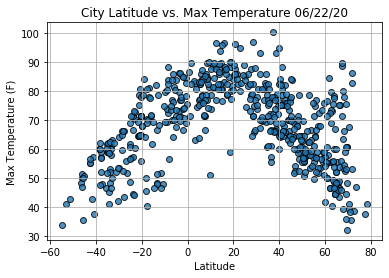

In [81]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

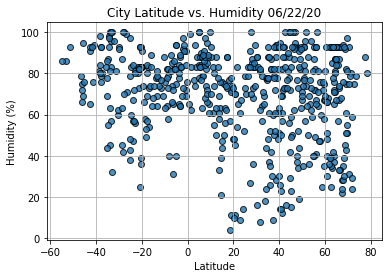

In [82]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

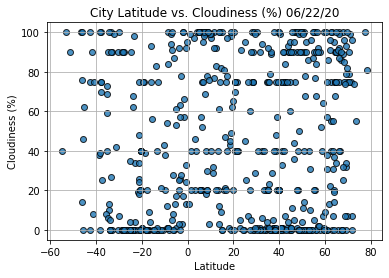

In [83]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

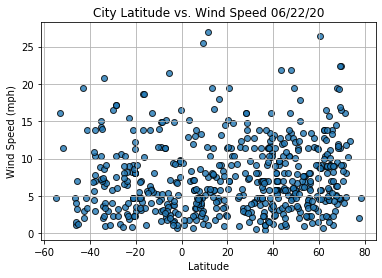

In [84]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()